<a href="https://colab.research.google.com/github/geyzon-assis/estudos/blob/master/Modulo_8_Fundamentos_de_Machine_Learning_Exercicio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


<br><br>

### Considere o dataset abaixo:

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DS_mentorama_1/Modulo8/dataframe_exercicio_modulo_8.csv")
print(df.shape)
df.head()

(2460, 5)


,ind_pop_cid,perc_pol,taxa_crim,nivel_ed,crimes
0,1.0,7.185471,62.082693,10.0,77
1,1.0,24.456750,88.244380,6.0,202
2,1.0,19.791772,94.930257,1.0,348
3,4.0,10.089496,41.791507,6.0,114
4,3.0,34.697495,67.615795,1.0,47


Descrição das variáveis:

ind_pop_cid = índice entre 1 e 5, indicando o tamanho da população de uma cidade; quanto maior o índice, maior a cidadel;

perc_pol = percentual de policiais ativos na cidade;

taxa_crim = taxa de criminalidade histórica da cidade;

nivel_ed = nível educacional médio da cidade;

crimes = quantidade de crimes registrados no mês vigente;

<br>
<br>

# Exercícios

<br>

## Parte 1:

Os exercícios abaixo tratarão a respeito da criação de modelos de aprendizado de máquina. Vimos que precisamos controlar o overfitting dos modelos e medir a capacidade de generalização dos mesmos. Para isso, é interessante termos os dados disponíveis divididos em treino/validação/teste. 

#### Crie uma função para fazer a divisão de treino/teste.

Esta função deve ter dois parâmetros de entrada:

    1- dataframe disponível;
    2- percentual do dataset que será disponibilizado para os dados de teste;
    
e deve retornar dois dataframes.

(__Exemplo:__ Se o dataframe disponível possui 100 linhas e queremos 25% dos dados para teste, então a função deve retornar dois dataframes, um com 75 linhas (o dataset de treino) e outro com as 25 linhas restantes (o dataset de teste).)



## Parte 2:

### 1 - 

Usando __apenas UMA variável__, crie modelos de aprendizado de máquina para prever a quantidade de crimes a partir desta única variável. Justifique a escolha desta variável.

Instancie vários modelos e compare-os de acordo com as métricas de performance. Indique quais modelos estão sofrendo overfitting. 

### 2 - 

Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.



#Parte 1

In [ ]:
#Crie uma função para fazer a divisão de treino/teste.
import numpy as np

def split_data(df, perc):
  n_test = int(np.round(df.shape[0]*perc))
  n_train = df.shape[0] - n_test

  df_train = df.iloc[0:n_train,:]
  df_test  = df.iloc[n_train:,:]
  print(type(df_train))
  return df_train, df_test

In [ ]:
df_train,df_test = split_data(df,0.25)

<class 'pandas.core.frame.DataFrame'>




#Parte 2
##1

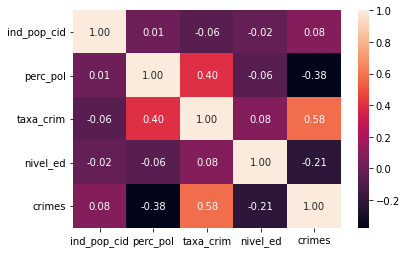

In [ ]:
import seaborn as sns
sns.heatmap(df_train.corr(),annot=True, fmt = '.2f')

Comparando as correlações, pode-se perceber que a taxa_crim é a que mais representa a coluna crimes, então será nossa variável utilizada


In [ ]:
def RMSE(y, y_pred):
    return np.sqrt(np.mean((y - y_pred)**2))

In [ ]:
x_train = df_train['taxa_crim'].values.reshape(-1,1)
y_train = df_train['crimes'].values.reshape(-1,1)
x_test = df_test['taxa_crim'].values.reshape(-1,1)
y_test = df_test['crimes'].values.reshape(-1,1)
#Poderia usar o train_test_split do sklearn

from sklearn.linear_model import     LinearRegression
from sklearn.neighbors    import KNeighborsClassifier
linear_regr = LinearRegression()
knn = KNeighborsClassifier(n_neighbors = 5)
linear_regr.fit(x_train,y_train)
knn.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
linear_ypred = linear_regr.predict(x_test)
knn_ypred = knn.predict(x_test)
rmse_linear = RMSE(y_test,linear_ypred)
rmse_knn    = RMSE(y_test,knn_ypred)

print('o RMSE do modelo linear foi {}'.format(rmse_linear))
print('o RMSE do KNN foi {}'.format(rmse_knn))
print("Resultado do modelo linear foi {:.2f}%".format(linear_regr.score(x_test,y_test)*100))
print("Resultado do KNN foi {:.2f}%".format(knn.score(x_test,y_test)*100))

o RMSE do modelo linear foi 94.7991528382499
o RMSE do KNN foi 168.7448957725716
Resultado do modelo linear foi 34.25%
Resultado do KNN foi 0.81%


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

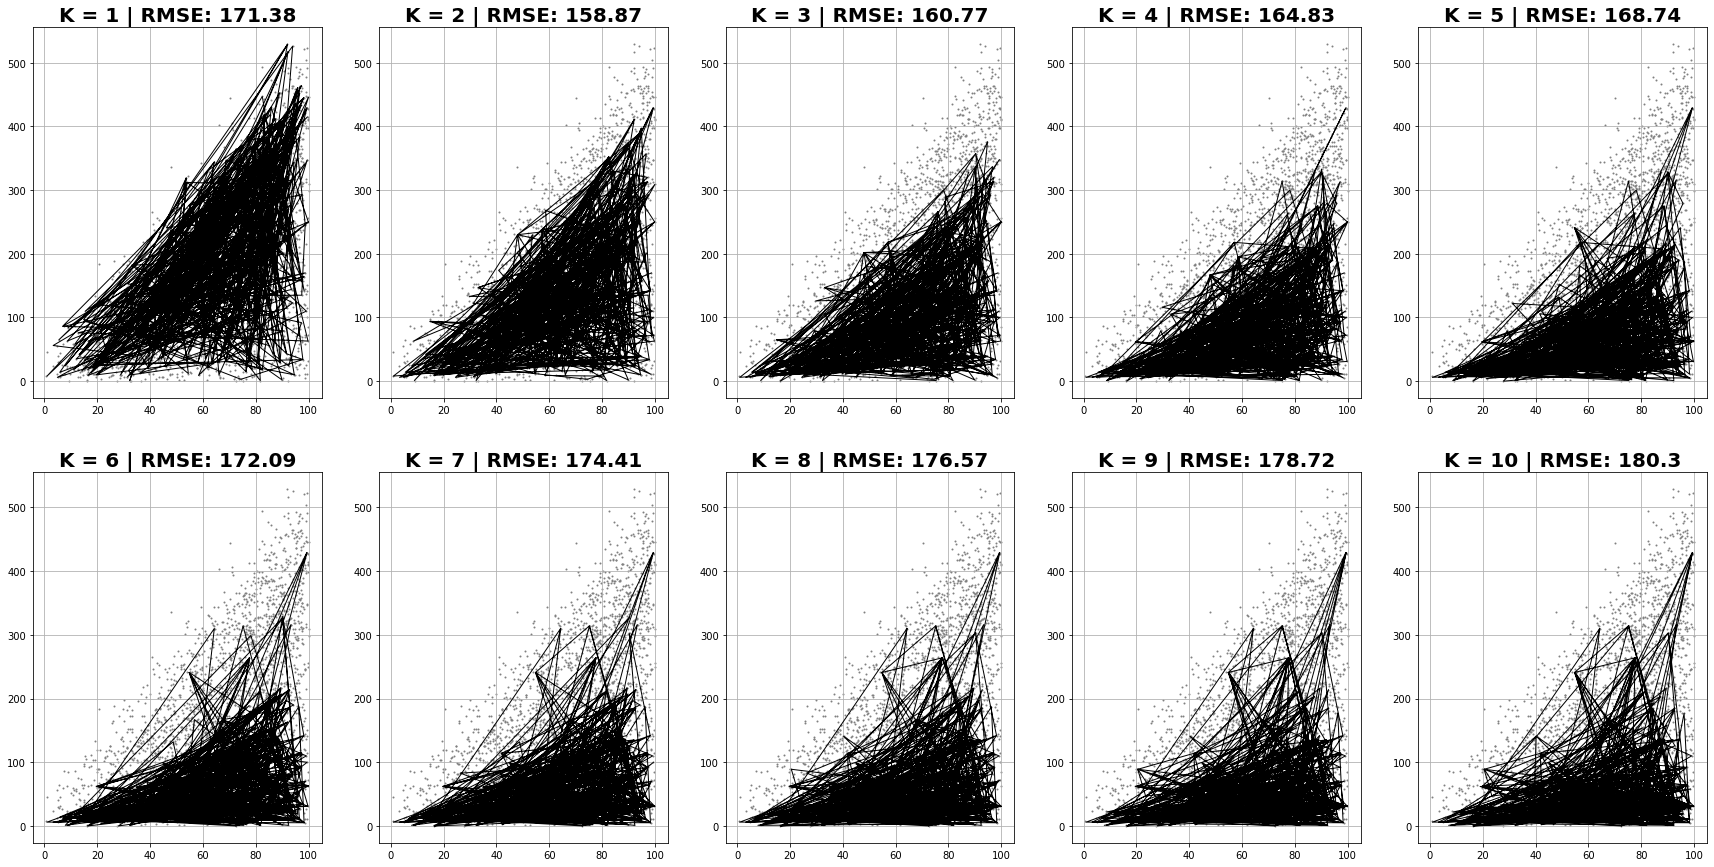

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=[30,15])

for i in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train, y_train)
    rmse_knn = np.round(RMSE(y = y_test, y_pred = knn.predict(x_test)), 2)
    
    plt.subplot(2,5,i)
    plt.title("K = "+str(i)+" | RMSE: " + str(rmse_knn), fontsize = 20, fontweight = 'bold')
    plt.plot(x_test, knn.predict(x_test), c = 'black', lw = 1)
    plt.scatter(df['taxa_crim'], df['crimes'], s = 1, c = 'gray')
    plt.grid()

plt.show()

Não me parece ser um modelo certo para esse tipo de dado, tendo em vista a baixa taxa de acerto e esses linhas rabiscadas no grafico, indicado overfitting

In [ ]:
def plota_curva_regressao(X, y, Xnovo, ynovo, modelo, nome_modelo):
    
    modelo.fit(X, y)
    
    predicao_dataset_treino = modelo.predict(X)
    predicao_dataset_novo = modelo.predict(Xnovo)
    
    rmse_dataset_treino = np.round(RMSE(y = y, y_pred = predicao_dataset_treino), 2)
    rmse_dataset_novo = np.round(RMSE(y = ynovo, y_pred = predicao_dataset_novo), 2)
    
    plt.figure(figsize = [20,6])
    plt.subplot(1,2,1)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET TREINO: " + str(rmse_dataset_treino),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(X, y, c = 'gray', s = 10)
    plt.plot(X, predicao_dataset_treino, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.subplot(1,2,2)
    plt.title("Modelo: " + nome_modelo + " ~ RMSE DATASET NOVO: " + str(rmse_dataset_novo),
              fontsize = 14, fontweight = 'bold')
    plt.scatter(Xnovo, ynovo, c = 'gray', s = 10)
    plt.plot(Xnovo, predicao_dataset_novo, c = 'blue', lw = 2, label = 'predição ')
    plt.legend(fontsize = 14)
    plt.grid()
    plt.show()

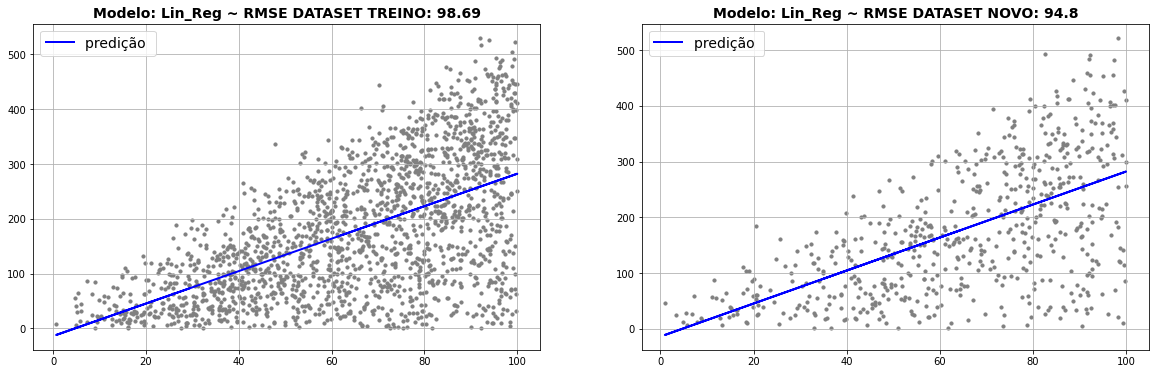

In [ ]:
modelo = LinearRegression()
nome_modelo = 'Lin_Reg'
plota_curva_regressao(x_train, y_train, x_test, y_test, modelo, nome_modelo)

A regressão linear possui um RMSE mais baixo e apresenta consistência entre o dataset de treino  e texto, não ocorrendo em overfiting

##2 - Agora, usando todas as variáveis disponíveis, refaça as análises do primeiro exercício e compare os resultados.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import     LinearRegression
from sklearn.neighbors    import KNeighborsClassifier

x = df.drop(['crimes'],axis=1)
y = df['crimes']

SEED = 10
np.random.seed(SEED)
train_x, test_x, train_y, test_y = train_test_split(x,y,
                                                    test_size = 0.30)
                                                    

model_ln = LinearRegression()
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_ln.fit(train_x,train_y)
model_knn.fit(train_x,train_y)

KNeighborsClassifier()

In [ ]:
df.taxa_crim.max()

99.99735514188644

In [ ]:
#linear_ypred = linear_regr.predict(test_x)
#knn_ypred = knn.predict(test_x)
#rmse_linear = RMSE(y_test,linear_ypred)
#rmse_knn    = RMSE(y_test,knn_ypred)

#print('o RMSE do modelo linear foi {}'.format(rmse_linear))
#print('o RMSE do KNN foi {}'.format(rmse_knn))
print("Resultado do modelo linear foi {:.2f}%".format(model_ln.score(test_x,test_y)*100))
print("Resultado do KNN foi {:.2f}%".format(model_knn.score(test_x,test_y)*100))

Resultado do modelo linear foi 90.75%
Resultado do KNN foi 0.81%


O Resultado utilizando mais variáveis melhorou muito o resultado da Regressão linear, diferentente do KNN, que me parece não ser o modelo mais adequado para esse conjunto de dados

In [ ]:
print('Intercepto:', model_ln.intercept_)

coeff_df = pd.DataFrame(model_ln.coef_,x.columns,columns=['Coefficient'])
print(coeff_df)

Intercepto: 47.455136694945224
             Coefficient
ind_pop_cid    12.417178
perc_pol       -8.811301
taxa_crim       4.738190
nivel_ed      -14.652414


O Intercepto é o valor de B0 na equação da regressão linear, ou seja, caso X seja 0, esse será o Y
Já os coeficientes são no B1,B2...Bn da equação, atribuindo peso a cada variável quanto o X é incrementado.

In [ ]:
from sklearn import metrics

y_pred = model_ln.predict(test_x)
print('MAE:', metrics.mean_absolute_error(test_y, y_pred))
print('MSE:', metrics.mean_squared_error(test_y, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(test_y, y_pred)))

MAE: 28.668948060679966
MSE: 1346.951557348317
RMSE: 36.7008386463895


Nosso modelo erra em média de 28 crimes por predição